In [422]:
#import required packages

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [423]:
#load the datatbase

df =  pd.read_csv("automobile.txt", sep=",")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [424]:
#remove aspiration, number of doors, engine location, fuel-system, compression-ratio, drive-wheels
df.drop('symboling',axis=1, inplace=True)
df.drop('aspiration',axis=1, inplace=True)
df.drop('num-of-doors',axis=1, inplace=True)
df.drop('engine-location',axis=1, inplace=True)
df.drop('fuel-system',axis=1, inplace=True)
df.drop('compression-ratio',axis=1, inplace=True)
df.drop('drive-wheels',axis=1, inplace=True)
df.drop('length',axis=1, inplace=True)
df.drop('width',axis=1, inplace=True)
df.drop('height',axis=1, inplace=True)


df.head()

,normalized-losses,make,fuel-type,body-style,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,convertible,88.6,2548,dohc,four,130,3.47,2.68,111,5000,21,27,13495
1,?,alfa-romero,gas,convertible,88.6,2548,dohc,four,130,3.47,2.68,111,5000,21,27,16500
2,?,alfa-romero,gas,hatchback,94.5,2823,ohcv,six,152,2.68,3.47,154,5000,19,26,16500
3,164,audi,gas,sedan,99.8,2337,ohc,four,109,3.19,3.40,102,5500,24,30,13950
4,164,audi,gas,sedan,99.4,2824,ohc,five,136,3.19,3.40,115,5500,18,22,17450


In [425]:
#drop any duplicate rows

df = df.drop_duplicates()


In [426]:
#ensure there is no cleaning to do with all the string columns
make = df['make'].unique()
print(f"There are {len(make)} makes")
make

There are 22 makes


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [427]:
fuel_type = df['fuel-type'].unique()
print(f"There are {len(fuel_type)} fuel types")
fuel_type

There are 2 fuel types


array(['gas', 'diesel'], dtype=object)

In [428]:
body_style = df['body-style'].unique()
print(f"There are {len(body_style)} body styles")
body_style

There are 5 body styles


array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [429]:
engine_type = df['engine-type'].unique()
print(f"There are {len(engine_type)} engine types")
engine_type

There are 7 engine types


array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [430]:
cylinders = df['num-of-cylinders'].unique()
print(f"There are {len(cylinders)} cylinders")
cylinders

There are 7 cylinders


array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [431]:
#check data types

df.dtypes

normalized-losses     object
make                  object
fuel-type             object
body-style            object
wheel-base           float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
bore                  object
stroke                object
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [432]:
#change data type of normalised-losses(int64), bore (float64), stroke(float64), horsepower(int64), peak-rpm(int64), price(int64)

#must remove ? in order to change data type
#https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
df = df.replace(to_replace="?",
           value="")

df.head()

#https://www.geeksforgeeks.org/how-to-convert-strings-to-floats-in-pandas-dataframe/

df['bore'] = pd.to_numeric(df['bore'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['price'] = pd.to_numeric(df['price'])


In [433]:
#to check data types have changed

df.dtypes


normalized-losses    float64
make                  object
fuel-type             object
body-style            object
wheel-base           float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [434]:
#missing data

missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

normalized-losses    41
make                  0
fuel-type             0
body-style            0
wheel-base            0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [435]:
#decided to remove normaized losses as it has a large amount of missing data and not 100% what the losses are of

df.drop('normalized-losses',axis=1, inplace=True)

In [436]:
#replace all missing data with 0

df.fillna(0).head()

,make,fuel-type,body-style,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,88.6,2548,dohc,four,130,3.47,2.68,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,convertible,88.6,2548,dohc,four,130,3.47,2.68,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,hatchback,94.5,2823,ohcv,six,152,2.68,3.47,154.0,5000.0,19,26,16500.0
3,audi,gas,sedan,99.8,2337,ohc,four,109,3.19,3.40,102.0,5500.0,24,30,13950.0
4,audi,gas,sedan,99.4,2824,ohc,five,136,3.19,3.40,115.0,5500.0,18,22,17450.0


In [437]:
#Data Stories and Visualisations:

In [438]:
#1. Comparing five most expensive cars to five least expensive cars:

large5 = df.nlargest(5, "price")
large5

,make,fuel-type,body-style,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,mercedes-benz,gas,hardtop,112.0,3715,ohcv,eight,304,3.80,3.35,184.0,4500.0,14,16,45400.0
16,bmw,gas,sedan,103.5,3380,ohc,six,209,3.62,3.39,182.0,5400.0,16,22,41315.0
73,mercedes-benz,gas,sedan,120.9,3900,ohcv,eight,308,3.80,3.35,184.0,4500.0,14,16,40960.0
128,porsche,gas,convertible,89.5,2800,ohcf,six,194,3.74,2.90,207.0,5900.0,17,25,37028.0
17,bmw,gas,sedan,110.0,3505,ohc,six,209,3.62,3.39,182.0,5400.0,15,20,36880.0


In [439]:
#top 5 cheapest makes
small5 = df.nsmallest(5, "price")
small5

,make,fuel-type,body-style,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,subaru,gas,hatchback,93.7,2050,ohcf,four,97,3.62,2.36,69.0,4900.0,31,36,5118.0
18,chevrolet,gas,hatchback,88.4,1488,l,three,61,2.91,3.03,48.0,5100.0,47,53,5151.0
50,mazda,gas,hatchback,93.1,1890,ohc,four,91,3.03,3.15,68.0,5000.0,30,31,5195.0
150,toyota,gas,hatchback,95.7,1985,ohc,four,92,3.05,3.03,62.0,4800.0,35,39,5348.0
76,mitsubishi,gas,hatchback,93.7,1918,ohc,four,92,2.97,3.23,68.0,5500.0,37,41,5389.0


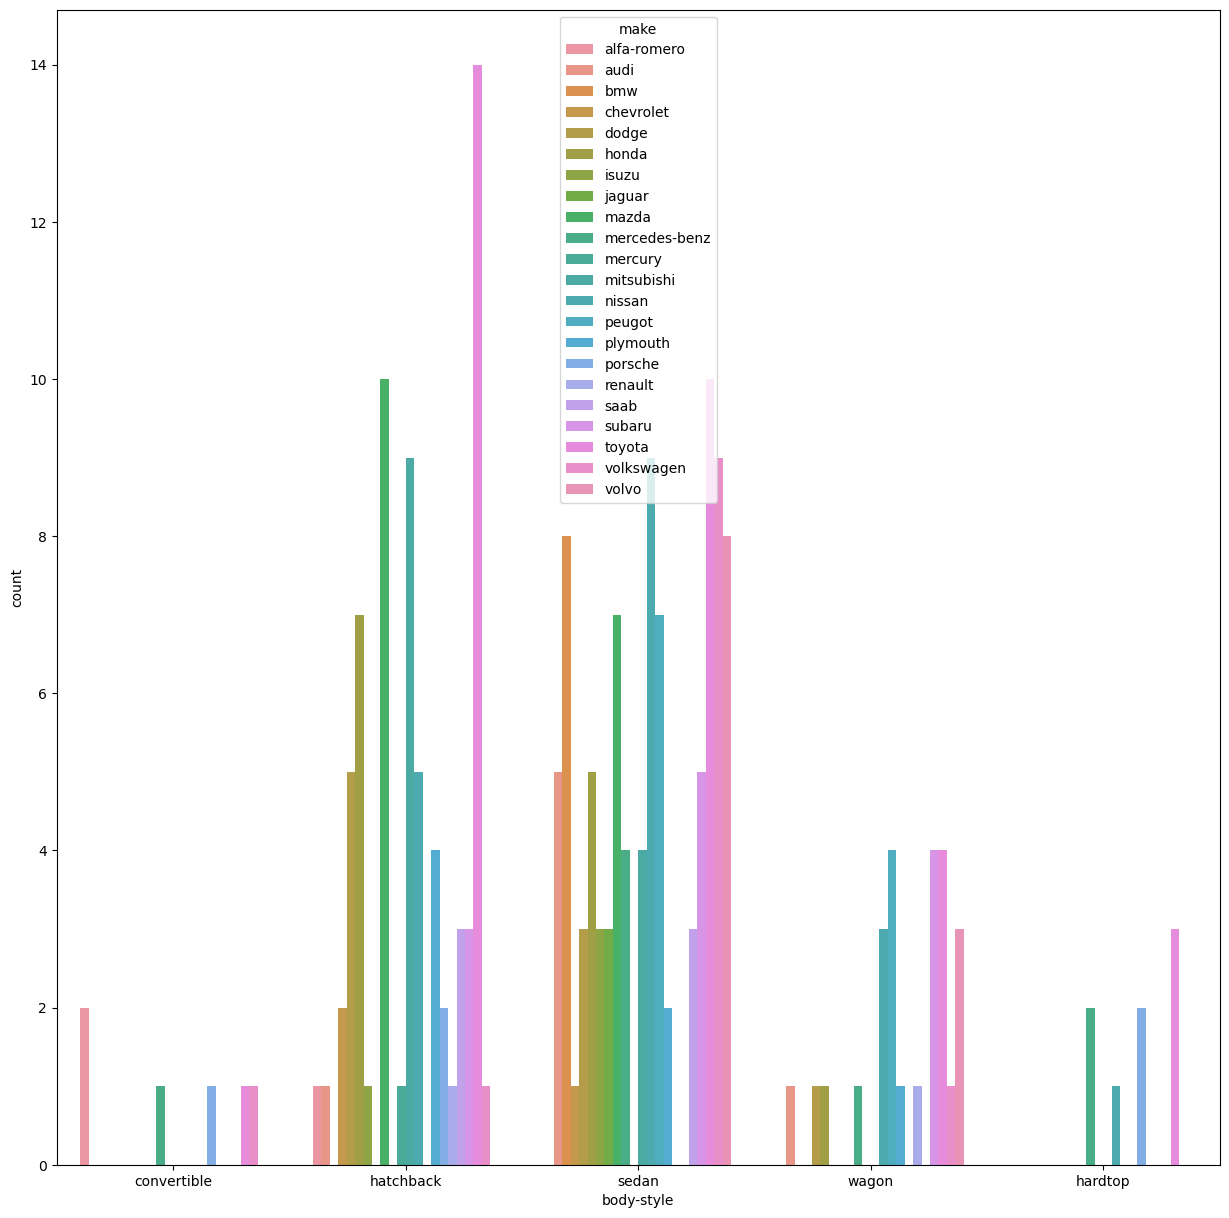

In [440]:
#2. Most popular body-style produced by each make

fig = plt.figure(figsize=(15,15))
sns.countplot(x=df['body-style'], hue=df['make'], data=df);

In [441]:
#3. Compare the two most popular body-styles to each other: hatchbacks and sedans.

#used stack overflow to show me how to specify groupby: https://stackoverflow.com/questions/29632784/pandas-groupby-where-column-value-is-greater-than-x

hatchback_sedan = df[(df['body-style']== "hatchback")|(df['body-style']== "sedan")].groupby(by=['body-style'])

df_avg = round(hatchback_sedan.mean(),0)
df_avg


,wheel-base,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,
hatchback,96.0,2348.0,114.0,3.0,3.0,101.0,5233.0,26.0,32.0,9957.0
sedan,101.0,2611.0,131.0,3.0,3.0,103.0,5082.0,25.0,31.0,14460.0


In [442]:
#4. Compare the two least popular body-styles to each other: convertible and hardtop.

convertible_hardtop = df[(df['body-style']== "convertible")|(df['body-style']== "hardtop")].groupby(by=['body-style'])

df_avg = round(convertible_hardtop.mean(),0)
df_avg

,wheel-base,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,
convertible,93.0,2802.0,157.0,3.0,3.0,132.0,5158.0,20.0,26.0,21890.0
hardtop,98.0,2811.0,176.0,4.0,3.0,142.0,5031.0,22.0,27.0,22208.0


<AxesSubplot:xlabel='body-style'>

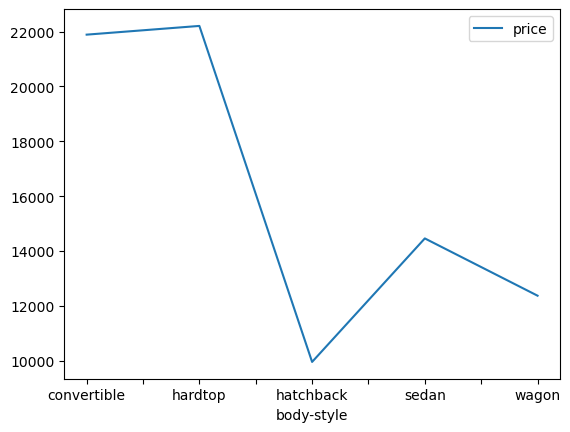

In [474]:
#6. A line graph showing the average price of all five body-styles.

group_by_bodystyle = df.groupby(by=['body-style'])
data_avg = round(group_by_bodystyle.mean(),0)

avg_price = pd.DataFrame({'price': data_avg['price']})

avg_price.plot(kind='line')



<AxesSubplot:title={'center':'Average Engine Size'}>

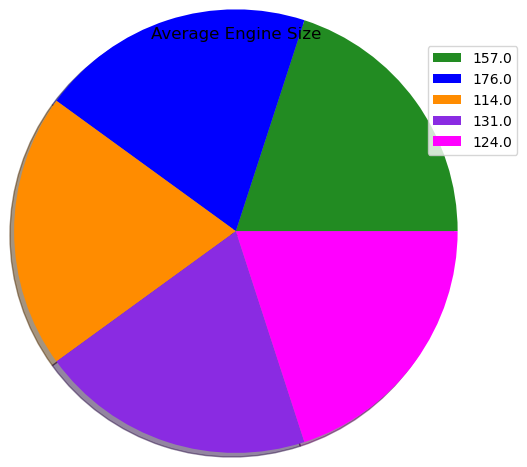

In [444]:
#7. A pie chart of the average engine-size of all 5 body-types.

#used stack overflow for design: https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend


colors = ['forestgreen','blue','darkorange','blueviolet','magenta']
data = data_avg['engine-size'].value_counts().plot(kind="pie", title='Average Engine Size', ylabel='', labeldistance=None, radius=1.5, shadow=True, colors=colors, legend = True)
data.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
data

<AxesSubplot:xlabel='body-style', ylabel='curb-weight'>

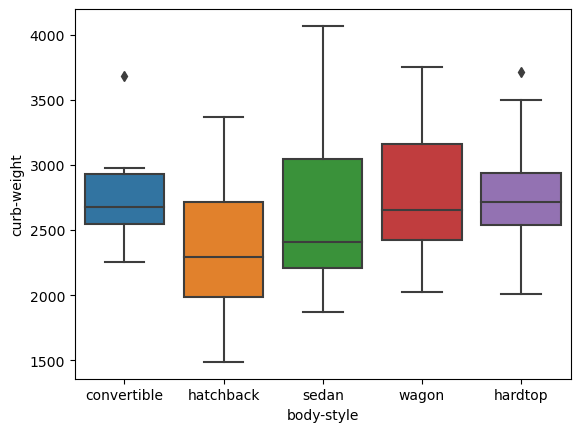

In [445]:
#8. A box plot comparing the body style to curb weight.
sns.boxplot(x ='body-style', y ='curb-weight', data = df)

In [447]:
#9. A bar chart comparing the number of cylinders to the average price.

group_by_cylinder = df.groupby(by=['num-of-cylinders'])

cylinder_data_avg = round(group_by_cylinder.mean(),0)
cylinder_data_avg

,wheel-base,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
num-of-cylinders,,,,,,,,,,
eight,109.0,3681.0,257.0,4.0,3.0,193.0,4850.0,15.0,19.0,38900.0
five,105.0,3133.0,152.0,3.0,3.0,122.0,5082.0,20.0,24.0,22008.0
four,98.0,2395.0,113.0,3.0,3.0,91.0,5113.0,27.0,33.0,10303.0
six,101.0,3134.0,185.0,3.0,3.0,162.0,5144.0,18.0,24.0,23672.0
three,88.0,1488.0,61.0,3.0,3.0,48.0,5100.0,47.0,53.0,5151.0
twelve,102.0,3950.0,326.0,4.0,3.0,262.0,5000.0,13.0,17.0,36000.0
two,95.0,2411.0,72.0,NaN,NaN,110.0,6000.0,17.0,23.0,13020.0


<AxesSubplot:xlabel='num-of-cylinders'>

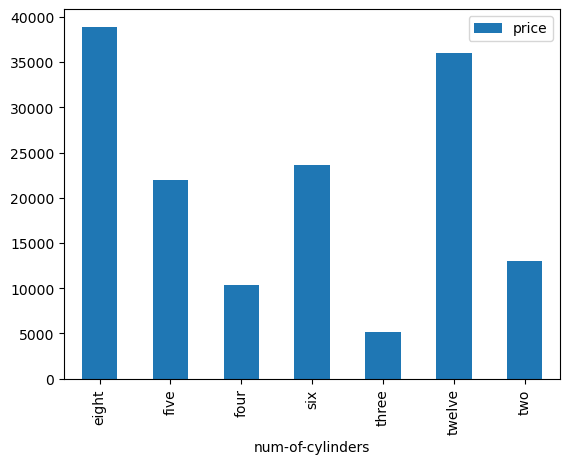

In [454]:
features_of_interest = pd.DataFrame({'price': cylinder_data_avg['price']})
        
features_of_interest.plot(kind='bar')


In [462]:
#10. A cat plot to demonstrate whether or not the engine type effects the price.

group_by_type = df.groupby(by=['engine-type'])

type_data_avg = round(group_by_type.mean(),0)
type_data_avg

,wheel-base,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-type,,,,,,,,,,
dohc,100.0,2977.0,157.0,3.0,3.0,146.0,5375.0,20.0,25.0,18116.0
dohcv,98.0,3366.0,203.0,4.0,3.0,288.0,5750.0,17.0,28.0,NaN
l,108.0,3077.0,130.0,4.0,3.0,96.0,4704.0,24.0,29.0,14628.0
ohc,98.0,2422.0,118.0,3.0,3.0,94.0,5134.0,27.0,33.0,11567.0
ohcf,95.0,2407.0,124.0,4.0,3.0,110.0,5000.0,24.0,30.0,13739.0
ohcv,103.0,3356.0,217.0,3.0,3.0,170.0,5015.0,17.0,21.0,25098.0
rotor,95.0,2411.0,72.0,NaN,NaN,110.0,6000.0,17.0,23.0,13020.0


<AxesSubplot:xlabel='engine-type'>

<Figure size 1500x1500 with 0 Axes>

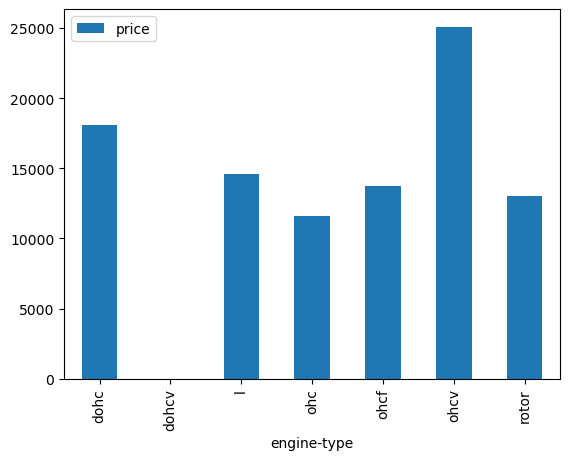

In [466]:

fig = plt.figure(figsize=(15,15))
#sns.countplot(x=df['engine-type'], hue=df['price'], data=df);

#sns.catplot(type_data_avg, x ='price', kind ='count', data = type_data_avg)


features_of_interest = pd.DataFrame({'price': type_data_avg['price']})


features_of_interest.plot(kind='bar')

<AxesSubplot:>

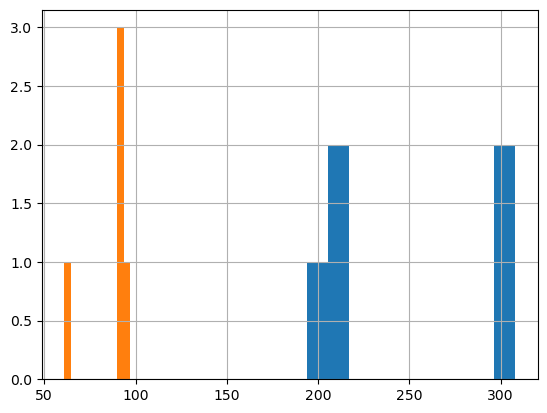

In [468]:
#11. Engine size

large5['engine-size'].hist()
small5['engine-size'].hist()
#blue == larget5 and orange == small5


<AxesSubplot:>

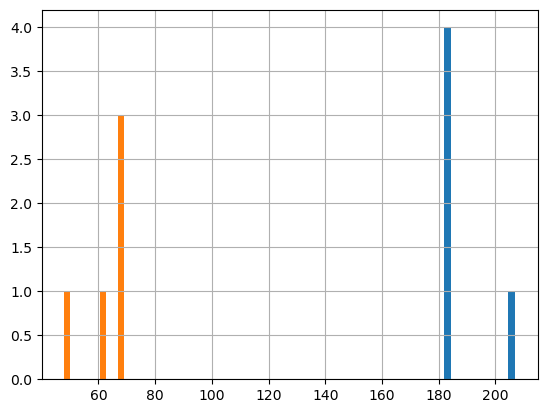

In [469]:
#12. Horsepower

large5['horsepower'].hist()
small5['horsepower'].hist()
#blue == larget5 and orange == small5

<AxesSubplot:>

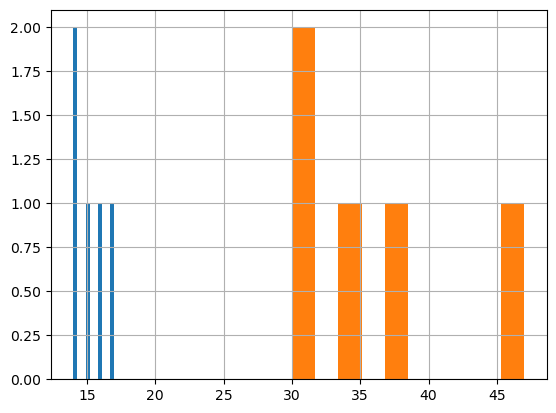

In [473]:
#13. Compare city-mpg to highway-mpg

#large5['highway-mpg'].hist()
large5['city-mpg'].hist()
#small5['highway-mpg'].hist()
small5['city-mpg'].hist()
#blue/red == larget5 and orange/green == small5